In [7]:
%load_ext autoreload
%autoreload 2

In [25]:
import numpy as np
import torch
from dynamic_quant_ops import tensor_quant_gelu, tensor_quant_scale
import matplotlib.pyplot as plt

In [9]:
inputs = torch.from_numpy(np.linspace(-2,2,10000))
gelu_gt = torch.nn.functional.gelu(inputs)
gelu_test = tensor_quant_gelu(inputs)

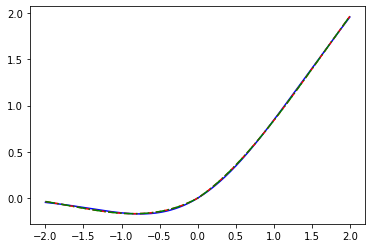

In [34]:
plt.plot(inputs, gelu_gt, 'b')
plt.plot(inputs, gelu_test, 'r--')
plt.plot(inputs, intgelu_test[0], 'g-.')
plt.show()

In [11]:
from transformers.models.ibert.quant_modules import IntGELU

In [13]:
intgelu = IntGELU()

In [31]:
inputs_int, inputs_scale = tensor_quant_scale(inputs, bits=32)
intgelu_test = intgelu(inputs, torch.Tensor([inputs_scale]))

/Users/oliver/miniforge3/envs/trans-fat/lib/python3.9/site-packages/transformers/models/ibert/quant_modules.py:350: UserWarning: __rfloordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  shift_int = 1.0 // sigmoid_scaling_factor


In [35]:
intgelu_test[0] / intgelu_test[1]

tensor([ 3.8039e+22,  3.8092e+22,  3.8145e+22,  ..., -2.0540e+24,
        -2.0545e+24, -2.0549e+24], dtype=torch.float64)